In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [69]:
data = pd.read_csv('dummy.csv')

In [70]:
data.head()

,Hours,Perk
0,2.5,0
1,5.1,1
2,3.2,0
3,8.5,1
4,3.5,0


In [71]:
data.describe()

,Hours,Perk
count,25.000000,25.0
mean,5.012000,0.6
std,2.525094,0.5
min,1.100000,0.0
25%,2.700000,0.0
50%,4.800000,1.0
75%,7.400000,1.0
max,9.200000,1.0


In [72]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1]


In [73]:
print(X.shape)
print(y.shape)

(25, 1)
(25,)


In [74]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42)

In [75]:
print(X_train.shape)
print(y_train.shape)

(20, 1)
(20,)


In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression()

In [78]:
#let's first build the model with whole data
model.fit(X, y)

LogisticRegression()

In [79]:
y_pred = model.predict(X)
y_pred_prob = model.predict_proba(X)
p1 = y_pred_prob[:,0]
p2 = y_pred_prob[:,1]
print(np.max(y_pred_prob, axis=1))

[0.90318701 0.85973341 0.75837296 0.99917911 0.66304818 0.97789048
 0.99972368 0.91950008 0.99887971 0.87235019 0.99715489 0.95512966
 0.706684   0.72872351 0.98801315 0.99955934 0.90318701 0.95956922
 0.96673178 0.99546972 0.87235019 0.79350855 0.55231668 0.99018822
 0.99756392]


In [80]:
df = pd.DataFrame({'X': data['Hours'].values, 
                   'True Class': y, 
                   'Predicted Class': y_pred, 
                   'Pr(Perk=0|X)': p1,
                   'Pr(Perk=1|X)': p2})
                   #'Predicted Prob': np.max(y_pred_prob,axis=1)})
df

,X,True Class,Predicted Class,Pr(Perk=0|X),Pr(Perk=1|X)
0,2.5,0,0,0.903187,0.096813
1,5.1,1,1,0.140267,0.859733
2,3.2,0,0,0.758373,0.241627
3,8.5,1,1,0.000821,0.999179
4,3.5,0,0,0.663048,0.336952
5,1.5,0,0,0.977890,0.022110
6,9.2,1,1,0.000276,0.999724
7,5.5,1,1,0.080500,0.919500
8,8.3,1,1,0.001120,0.998880
9,2.7,0,0,0.872350,0.127650


In [81]:
#build a model just on train set (X_train, y_train)
#and test the built model on test set/development set (X_test, y_test)
model_new = LogisticRegression()

In [82]:
model_new.fit(X_train, y_train)

LogisticRegression()

In [83]:
print(X_test)
print(y_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]
[1 0 0 1 1]


In [84]:
y_pred = model_new.predict(X_test)
y_pred_prob = model_new.predict_proba(X_test)
p1 = y_pred_prob[:,0]
p2 = y_pred_prob[:,1]

In [85]:
df = pd.DataFrame({'X_test': X_test.reshape(-1), 
                   'True Class': y_test, 
                   'Predicted Class': y_pred, 
                   'Pr(Perk=0|X)': p1,
                   'Pr(Perk=1|X)': p2})
df

,X_test,True Class,Predicted Class,Pr(Perk=0|X),Pr(Perk=1|X)
0,8.3,1,1,0.001855,0.998145
1,2.5,0,0,0.879623,0.120377
2,2.5,0,0,0.879623,0.120377
3,6.9,1,1,0.013518,0.986482
4,5.9,1,1,0.054010,0.945990


In [86]:
print('Accuracy:', np.mean(y_pred == y_test))

Accuracy: 1.0


In [87]:
x = [[0.5]]
print('Hours:',x,'gets the perk?', model_new.predict(x))
print('With probability:',np.max(model_new.predict_proba(x)))

Hours: [[0.5]] gets the perk? [0]
With probability: 0.9921777917716469


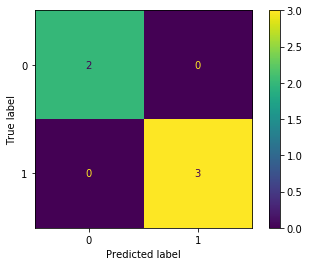

In [88]:
#Let's plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_new, X_test, y_test)

**Homework:**
    
*Q1.* Download the Wisconsin Breast Cancer (Diagnostic) dataset from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

*Q2.* Do some Exploratory Data Analysis on this dataset.

*Q3.* Separate out the train and test sets from this dataset.

*Q4.* Built a Logistic Regression Model using the training set

*Q5.* Evaluate the performance of your built model on the test set.

*Q6.* Find out the accuracy, confusion matrix for the test set.

That's it!